In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from sklearn.manifold import TSNE

In [124]:
data = pd.read_csv('ATLAS_LC/signatures_32_encoded.csv')

In [125]:
encod_cols = [col for col in data.columns if 'encode' in col]

In [255]:
test_set = data.sample(8000)

In [263]:
t = TSNE(n_components=2, perplexity=25, learning_rate=50, early_exaggeration=90)
embed = t.fit_transform(test_set[encod_cols].values)

In [264]:
embed.shape

(8000, 2)

In [265]:
test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

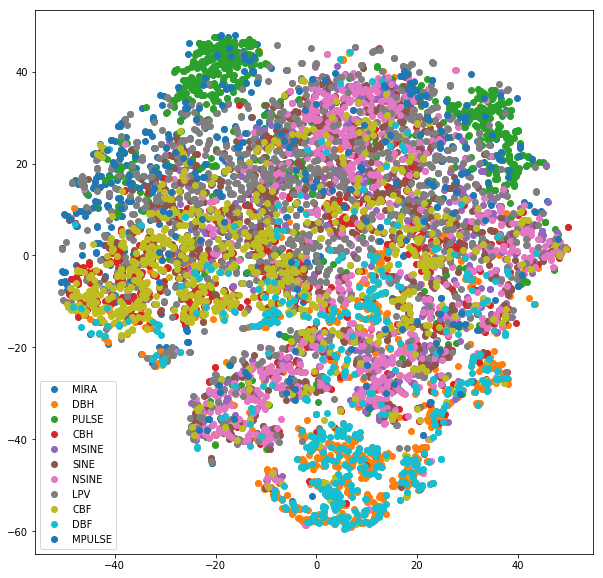

In [266]:
plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname)
    i+=1
plt.legend()